In [2]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import random
from collections import Counter
import pandas as pd
import seaborn as sns


In [3]:
data_dir = '../data'
splits = ['train', 'valid', 'test']
classes = ['0', '1']

def get_image_folder(split, cls):
    return os.path.join(data_dir, split, cls)


Count Images in Each Split and Class. 
Why is this important?
- To calculate the imbalance in the dataset, we need to know how many images are present in each class for each split.

In [ ]:
print("Image Count per Class:")
for split in splits:
    for cls in classes:
        folder = get_image_folder(split, cls)
        count = len(os.listdir(folder))
        print(f"{split.upper()} | Class {cls}: {count} images")


Image Count per Class:
TRAIN | Class 0: 1569 images
TRAIN | Class 1: 803 images
VALID | Class 0: 448 images
VALID | Class 1: 227 images
TEST | Class 0: 208 images
TEST | Class 1: 128 images


In [12]:
print("Class Distribution Percentages:")

for split in splits:  
    folder_0 = get_image_folder(split, '0') 
    folder_1 = get_image_folder(split, '1')  

    count_0 = len(os.listdir(folder_0))  
    count_1 = len(os.listdir(folder_1))  
    total = count_0 + count_1  

    pct_0 = (count_0 / total) * 100  
    pct_1 = (count_1 / total) * 100  

    print(f"{split.upper()}: Class 0 = {pct_0:.2f}% | Class 1 = {pct_1:.2f}%")


Class Distribution Percentages:
TRAIN: Class 0 = 66.15% | Class 1 = 33.85%
VALID: Class 0 = 66.37% | Class 1 = 33.63%
TEST: Class 0 = 61.90% | Class 1 = 38.10%


Visualize Sample Images from Each Class.
Why is this important?
 - To understand the characteristics of each class, we need to visualize some sample images from each class.


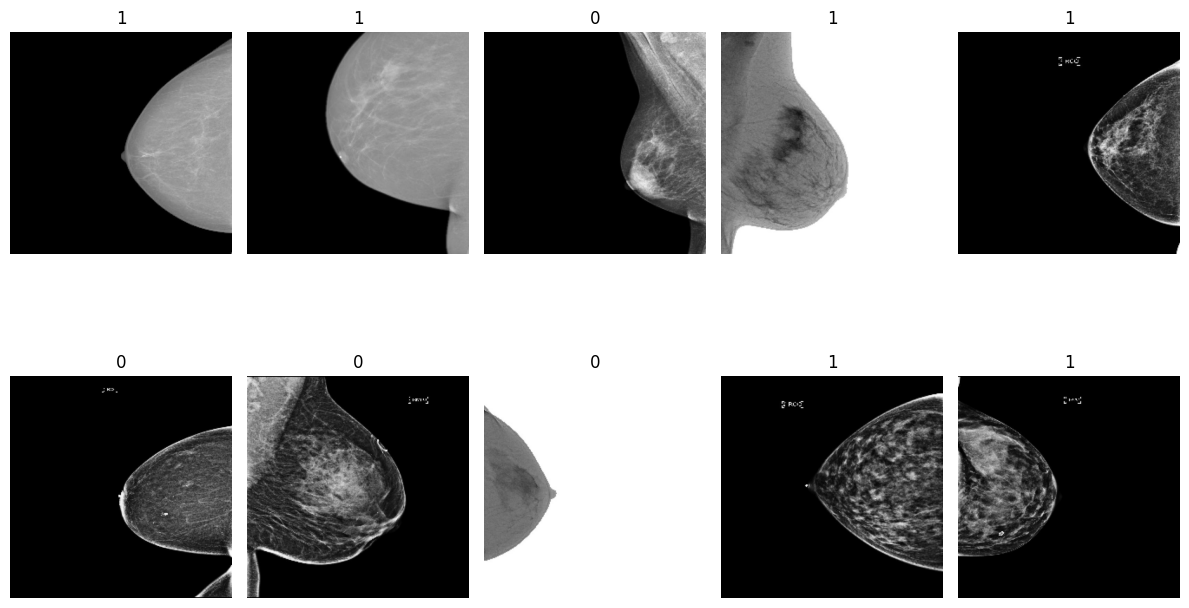

In [6]:
def show_random_images_loop(split='train', num_images=6):
    plt.figure(figsize=(12, 8))
    for i in range(num_images):
        cls = random.choice(classes)
        folder = get_image_folder(split, cls)
        img_file = random.choice(os.listdir(folder))
        img = Image.open(os.path.join(folder, img_file))
        plt.subplot(2, 5, i+1)  
        plt.imshow(img, cmap='gray')
        plt.title(cls)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_random_images_loop('train', 10)


Analyze Image Sizes.
    Why is this important?
- To ensure that the model can handle the input sizes, 
    we need to analyze the distribution of image sizes in the dataset.

In [7]:
def analyze_image_sizes(split='train'):
    sizes = []  
    for cls in classes:
        folder = get_image_folder(split, cls)
        for img_file in os.listdir(folder):
            img = Image.open(os.path.join(folder, img_file))
            sizes.append(img.size)
    
    size_counts = Counter(sizes)
    print("Common image sizes:", size_counts)

analyze_image_sizes('train')

Common image sizes: Counter({(640, 640): 2372})


Visualize Class Distribution Across Dataset Splits.
    Why is this important?
- To understand the balance of classes in the dataset, 
we need to visualize the distribution of classes across different splits.

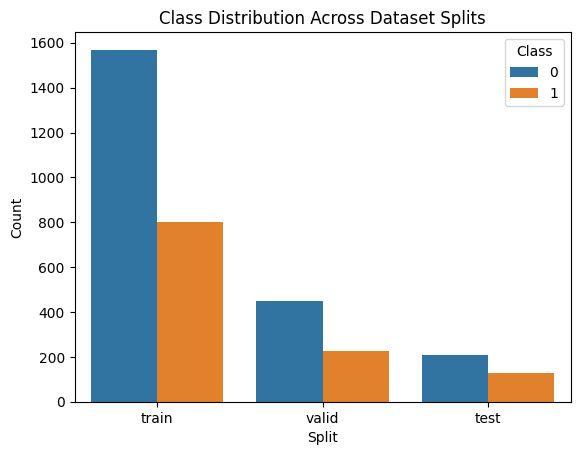

In [9]:
counts = []
for split in splits:
    for cls in classes:
        folder = get_image_folder(split, cls)
        counts.append({'Split': split, 'Class': cls, 'Count': len(os.listdir(folder))})

df = pd.DataFrame(counts)

sns.barplot(data=df, x='Split', y='Count', hue='Class')
plt.title("Class Distribution Across Dataset Splits")
plt.show()